1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


covariance matrix:
 [[ 1.01992909  0.07070478  2.11056295]
 [ 0.07070478  8.92559273  9.06700228]
 [ 2.11056295  9.06700228 13.28812817]]

eigenvalues of cov matrix:	 [ 2.05811871e+01+0.j -1.81603131e-15+0.j  2.65246288e+00+0.j]
eignenvectors of cov matrix:
: [[-0.08702317 -0.81649658  0.57075415]
 [-0.61200505 -0.40824829 -0.67733533]
 [-0.78605139  0.40824829  0.46417298]]

compute eigenvalues and eigenvectors using the SVD:
U (eigenvectors):
 [[-0.08702317  0.57075415 -0.81649658]
 [-0.61200505 -0.67733533 -0.40824829]
 [-0.78605139  0.46417298  0.40824829]]
spectrum:
 [2.05811871e+01 2.65246288e+00 2.00449025e-15]
Variability in each component referring to:	 [2.05811871e+01 2.65246288e+00 2.00449025e-15] 
variablity %:	 [8.85835291e+01 1.14164709e+01 8.62753054e-15]


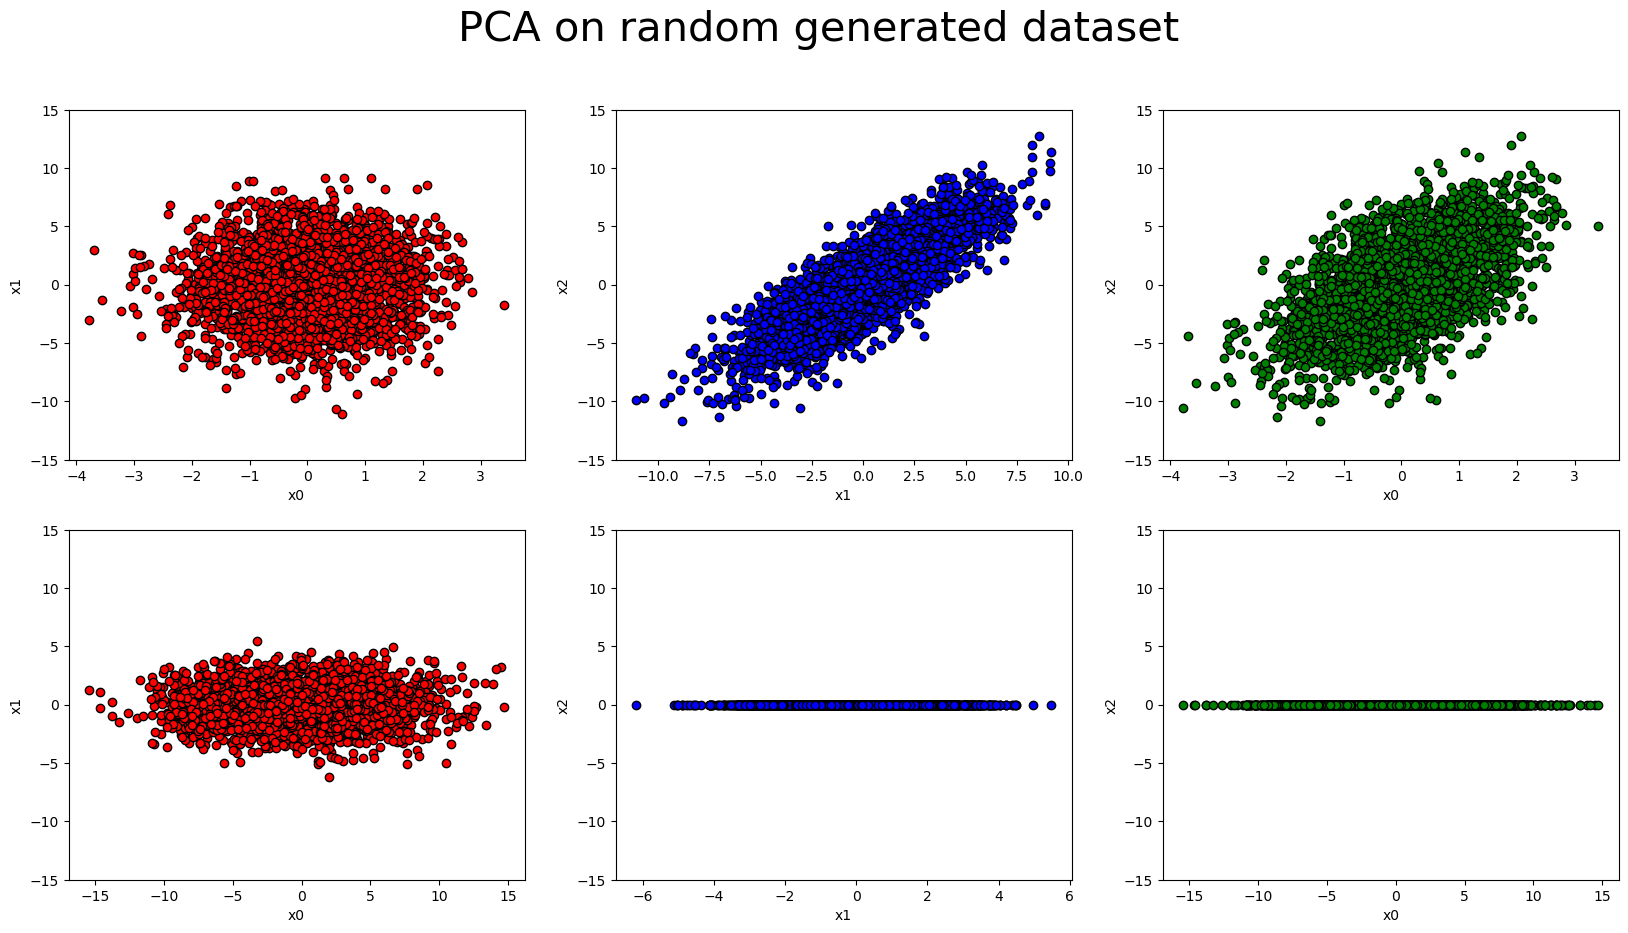

In [3]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

np.random.seed(2090010)

# dataset generation
n_samples = 3000
x1 = np.random.normal(0,1,n_samples)
x2 = np.random.normal(0,3,n_samples)
x3 = 2*x1 + x2

data = np.vstack([x1,x2,x3])

# compute covariance matrix and find its eigenvectors and eigenvalues
cov_data = np.cov(data)
print("covariance matrix:\n", cov_data)

eig_val, eig_vec = la.eig(cov_data)
print("\neigenvalues of cov matrix:\t",eig_val)
print("eignenvectors of cov matrix:\n:", eig_vec)

# find eigenvectors and eigenvalues using SVD
U, spectrum, V = la.svd(cov_data)
print("\ncompute eigenvalues and eigenvectors using the SVD:")
print("U (eigenvectors):\n",U)
print("spectrum:\n", spectrum)

# What percent of the total dataset's variability is explained by the principal components?
explained_variability = spectrum / np.sum(spectrum)
print("Variability in each component referring to:\t", spectrum, "\nvariablity %:\t", explained_variability*100)

# the varibility makes sense. in X1 there is a lot of information, in x2 nothing since is youst x1 plus a noise, and in x3 there is
# a combination of x1 and x2. If we keep the first and last component we have 99% of the total variability

# Redefine data with the eigenvector basis

new_basis_data = np.dot(U.T,data)

# plot the new and ald data
all_sets = [data, new_basis_data]

fig, ax = plt.subplots(2,3,figsize=(20,10))
fig.suptitle("PCA on random generated dataset", fontsize=30)

for i in range(2):
  ax[i,0].scatter(all_sets[i][0],all_sets[i][1],color="r", edgecolor="black")
  ax[i,0].set_ylim(-15,15)
  ax[i,0].set_xlabel("x0")
  ax[i,0].set_ylabel("x1")

  ax[i,1].scatter(all_sets[i][1],all_sets[i][2],color="b", edgecolor="black")
  ax[i,1].set_ylim(-15,15)
  ax[i,1].set_ylabel("x2")
  ax[i,1].set_xlabel("x1")

  ax[i,2].scatter(all_sets[i][0],all_sets[i][2],color="g", edgecolor="black")
  ax[i,2].set_ylim(-15,15)
  ax[i,2].set_xlabel("x0")
  ax[i,2].set_ylabel("x2")





2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

covariance matrix:
 [[ 1.02265504  0.06903775  2.11434783]
 [ 0.06903775  8.92654421  9.06461971]
 [ 2.11434783  9.06461971 13.29331538]]

eigenvalues of cov matrix:	 [2.05828178e+01+0.j 1.85551745e-16+0.j 2.65969683e+00+0.j]
eignenvectors of cov matrix:
: [[-0.08713756 -0.81649658  0.5707367 ]
 [-0.61186929 -0.40824829 -0.67745797]
 [-0.7861444   0.40824829  0.46401542]]

compute eigenvalues and eigenvectors using the SVD:
U (eigenvectors):
 [[-0.08713756  0.5707367  -0.81649658]
 [-0.61186929 -0.67745797 -0.40824829]
 [-0.7861444   0.46401542  0.40824829]]
spectrum:
 [20.58281779  2.65969683  0.        ]
Variability in each component referring to:	 [20.58281779  2.65969683  0.        ] 
variablity %:	 [88.55675957 11.44324043  0.        ]


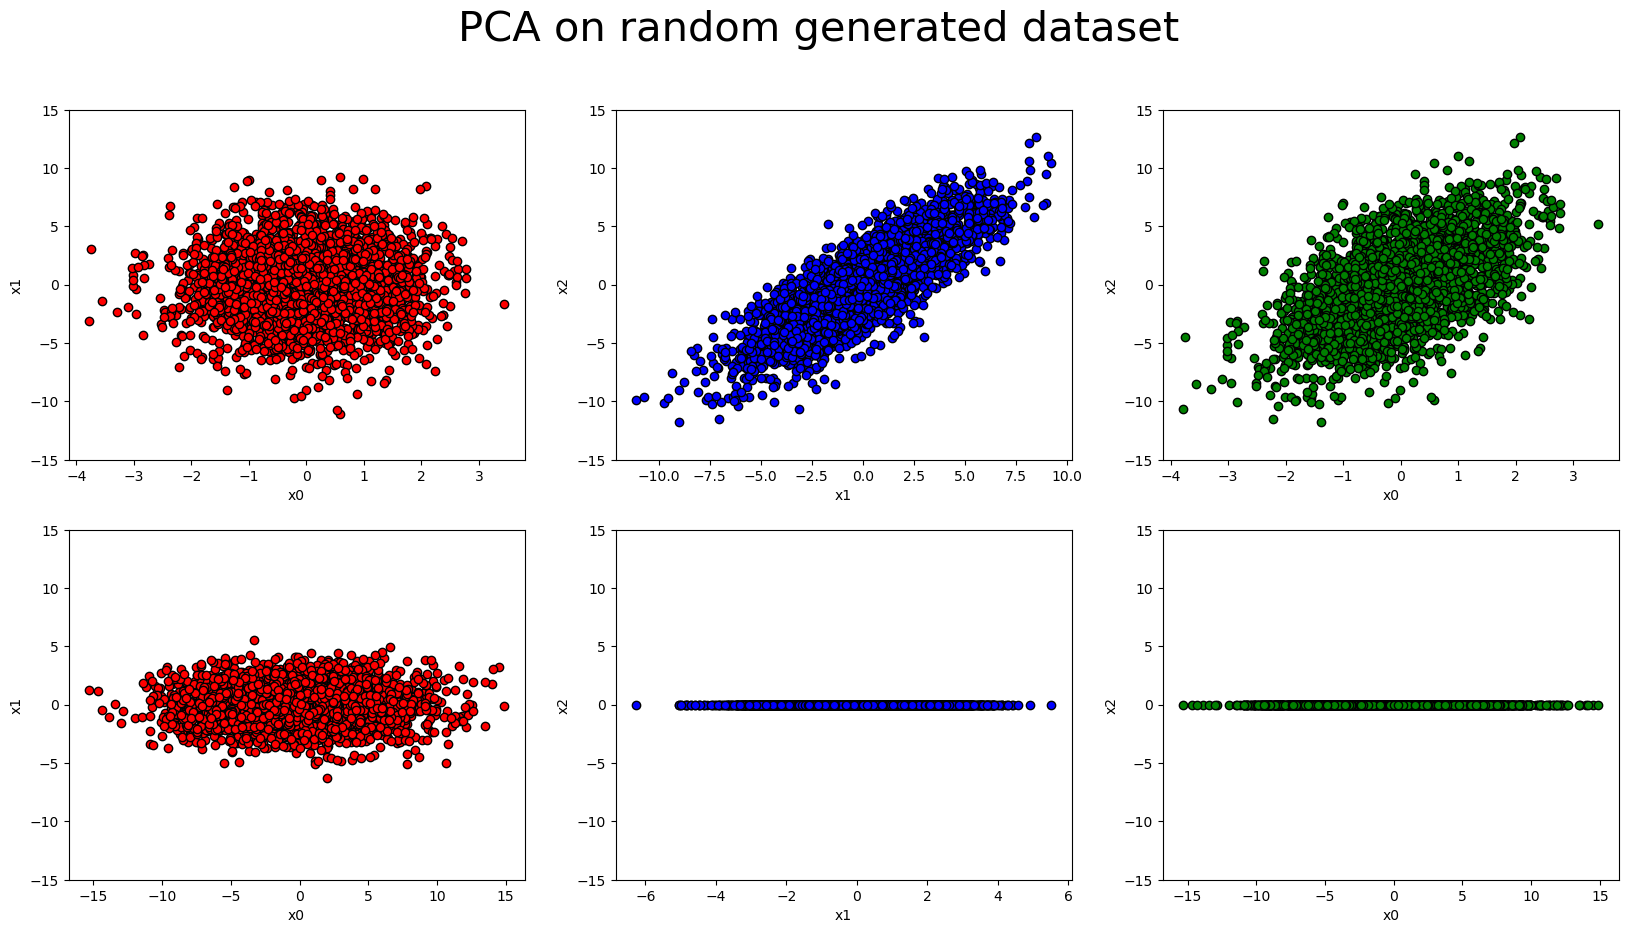

In [4]:
# here I add the noise and then repeat all the analysis
np.random.seed(2090010)
# dataset generation
n_samples = 3000
x1 = np.random.normal(0,1,n_samples)
x2 = np.random.normal(0,3,n_samples)



for i in range(10):
  x1 = x1 + np.random.normal(0,scale=1 / 50,size=n_samples)
  x2 = x2 + np.random.normal(0,scale=1 / 50,size=n_samples)

x3 = 2*x1 + x2

data = np.vstack([x1,x2,x3])

# compute covariance matrix and find its eigenvectors and eigenvalues
cov_data = np.cov(data)
print("covariance matrix:\n", cov_data)

eig_val, eig_vec = la.eig(cov_data)
print("\neigenvalues of cov matrix:\t",eig_val)
print("eignenvectors of cov matrix:\n:", eig_vec)

# find eigenvectors and eigenvalues using SVD
U, spectrum, V = la.svd(cov_data)
print("\ncompute eigenvalues and eigenvectors using the SVD:")
print("U (eigenvectors):\n",U)
print("spectrum:\n", spectrum)

# What percent of the total dataset's variability is explained by the principal components?
explained_variability = spectrum / np.sum(spectrum)
print("Variability in each component referring to:\t", spectrum, "\nvariablity %:\t", explained_variability*100)

# the varibility makes sense. in X1 there is a lot of information, in x2 nothing since is youst x1 plus a noise, and in x3 there is
# a combination of x1 and x2. If we keep the first and last component we have 99% of the total variability

# Redefine data with the eigenvector basis

new_basis_data = np.dot(U.T,data)

# plot the new and ald data
all_sets = [data, new_basis_data]

fig, ax = plt.subplots(2,3,figsize=(20,10))
fig.suptitle("PCA on random generated dataset", fontsize=30)

for i in range(2):
  ax[i,0].scatter(all_sets[i][0],all_sets[i][1],color="r", edgecolor="black")
  ax[i,0].set_ylim(-15,15)
  ax[i,0].set_xlabel("x0")
  ax[i,0].set_ylabel("x1")

  ax[i,1].scatter(all_sets[i][1],all_sets[i][2],color="b", edgecolor="black")
  ax[i,1].set_ylim(-15,15)
  ax[i,1].set_ylabel("x2")
  ax[i,1].set_xlabel("x1")

  ax[i,2].scatter(all_sets[i][0],all_sets[i][2],color="g", edgecolor="black")
  ax[i,2].set_ylim(-15,15)
  ax[i,2].set_xlabel("x0")
  ax[i,2].set_ylabel("x2")


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


fraction of variability explained per principal component: [8.61970410e-01 1.38029590e-01 4.98988360e-16 7.89303683e-17
 3.66207051e-17 2.04777113e-17 1.64642628e-17 2.97359885e-18
 1.47360591e-18 1.15828920e-18]


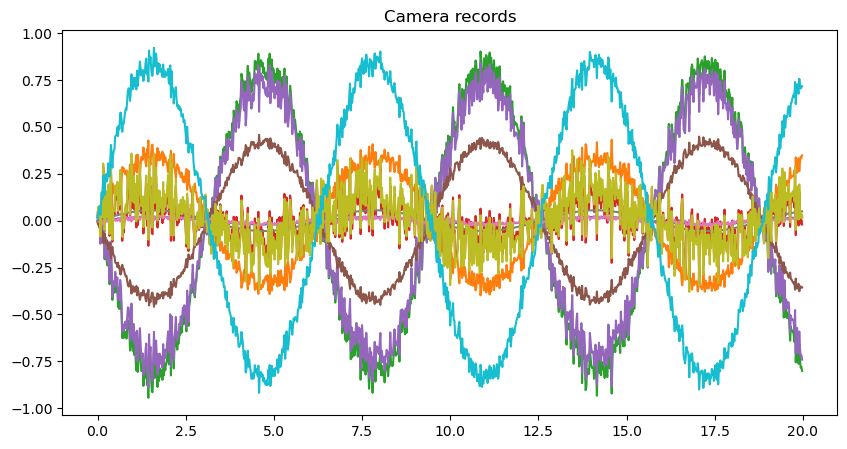

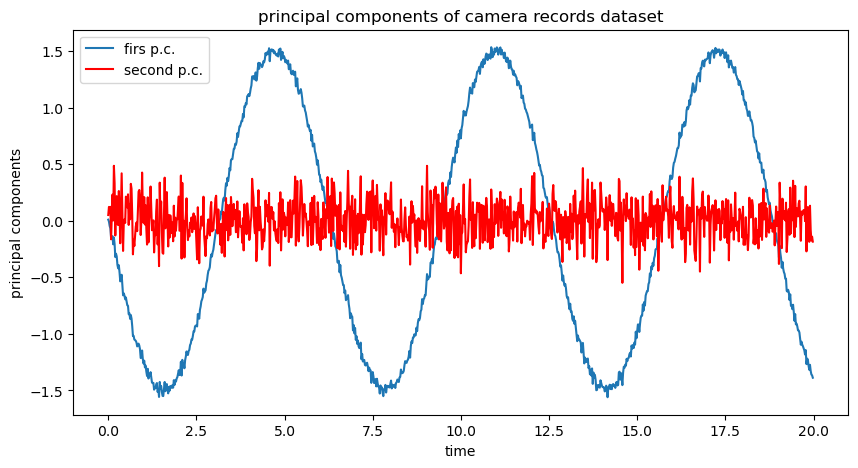

In [9]:
import numpy as np
# data simulation
omega = 1
A = 1
N = 1000
t = np.arange(0, 20, 20 / N)

x = A * np.sin(omega * t)
y = np.random.normal(scale=1 / 10, size=N)
position_xy = np.array([x, y]).T
# camera generation with 10 random coordinates
ncam = 10
cam_sphdir = [[np.random.rand() * 2 * np.pi, np.random.rand() * np.pi] for i in range(ncam)]

cam_cartdir_xy = np.array([  [np.sin(sph[0]) * np.cos(sph[1]), np.sin(sph[0]) * np.sin(sph[1])]   for sph in cam_sphdir])

# project each position of the spring alang camera direction described in cam_cartdir_xy
cam_records = np.array([[np.dot(camdir, pos) for pos in position_xy] for camdir in cam_cartdir_xy])

fig, ax = plt.subplots(1,1,figsize=(10,5))
for record in cam_records:
    ax.plot(t, record)
ax.set_title("Camera records")

# here we start the PCA

U, spectrum, Vt = np.linalg.svd(cam_records)

eigval = spectrum
explained_var = eigval / np.sum(eigval)

print('fraction of variability explained per principal component:', explained_var)

records_pc = np.dot(U.T, cam_records)

fig_pca, ax_pca = plt.subplots(1,1,figsize=(10,5))
ax_pca.set_title('principal components of camera records dataset')
ax_pca.plot(t, records_pc[0], label='firs p.c.')
ax_pca.plot(t, records_pc[1], color='r', label='second p.c.')
ax_pca.set_xlabel('time')
ax_pca.set_ylabel('principal components')
ax_pca.legend()





4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 